# Análisis de textos

In [1]:
%pip install num2words
%pip install nltk

%pip install numpy, pandas, matplotlib, seaborn, sklearn, pydantic, inflect, gensim
%pip install pandas-profiling


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'numpy,'



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import num2words
import re, unicodedata, inflect
import nltk
from gensim.models import Word2Vec
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport


/home/leo/Documents/back-bi/backend-virtualenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_159608/1941605045.py:26: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
import warnings
warnings.filterwarnings("ignore")

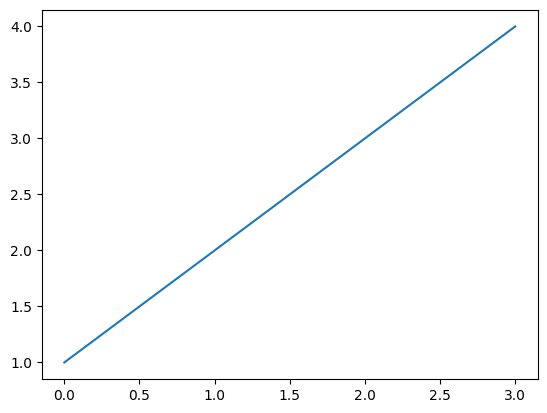

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])

In [5]:
RECALL = "Recall:"
PRECISION = "Precision:"
F1 = "F1:"

In [6]:
# Configuring pandas to show all cell content
pd.set_option("display.max_colwidth", None)

In [7]:
# Downloading stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to /home/leo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/leo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [9]:
ods_df = pd.read_csv("../data/cat_6716.csv")

In [10]:
ods_df.shape

(1518, 2)

In [11]:
ods_df.sample(5)

,Textos_espanol,sdg
227,"La capacitación en gestión del uso del agua puede ser invaluable para la gestión de la demanda de agua. La implementación de la economía verde brinda la oportunidad de reenfocar las prioridades de desarrollo en el agua. Durante el proceso de la entrevista, un experto en agua comentó: 'en el futuro no podemos vivir sin la economía verde, por lo tanto, debemos pensar en verde en todo lo que hacemos, comenzando por la gestión del agua'. Se reconoce que la infraestructura hidráulica nacional es arcaica y necesita ser mejorada. Se recomienda enfáticamente la infusión de tecnologías apropiadas, incluidas las tecnologías de la información y las comunicaciones, en el sector del agua.",6
1101,"Los diez proyectos seleccionados se beneficiarán de la emisión simplificada de permisos y la posibilidad de incentivos regulatorios, asignación de costos transfronterizos y financiamiento bajo el Instrumento de Asistencia Pre-Adhesión de la Unión Europea (UE) y el Mecanismo de Inversión en la Vecindad. Además, se han aprobado dos proyectos de electricidad y ocho de gas como Proyectos de Interés Mutuo con la UE. Requerirá una voluntad política e institucional sostenida para que las economías logren objetivos compartidos tanto a nivel nacional como regional mediante la implementación de los marcos legislativos y regulatorios adoptados. En la actualidad, el cumplimiento del Tercer Paquete de Energía de la UE es, en el mejor de los casos, irregular, pero es un requisito previo esencial para la interoperabilidad de los sistemas energéticos de la SEE y la UE, así como para mejorar la productividad y la competitividad del sector a nivel regional y nacional.",7
726,"La carga orgánica de las aguas residuales industriales tratadas vertidas a las aguas receptoras naturales representa el 3,142 por ciento de la carga orgánica de las aguas residuales urbanas vertidas a las aguas receptoras naturales. La Directiva del Consejo 76/464/EEC del 4 de mayo de 1976 sobre la contaminación causada por ciertas sustancias peligrosas vertidas en el medio ambiente acuático de la Comunidad ha sido transpuesta a la legislación rumana por MO No. El Anexo 2 de este GD modificatorio establece valores límite para contaminantes en aguas superficiales los cuales son altamente tóxicos, persistentes y bioacumulativos, además de estipular normas ambientales y estándares de calidad. El Anexo 6 ??contiene lineamientos para desarrollar un inventario de emisiones, descargas y pérdidas de sustancias prioritarias y contaminantes específicos.",6
1322,"El reciente aumento de la investigación sobre la ""buena gobernanza"" y la calidad de las instituciones gubernamentales ha sido impulsado por hallazgos empíricos que muestran que tales instituciones pueden ser la clave para comprender el crecimiento económico y el bienestar social en los países en desarrollo y en transición. Sin embargo, argumentamos que no se ha abordado un tema clave, a saber, qué significa realmente la calidad de gobierno (QoG) a nivel conceptual. Con base en análisis de teoría política, proponemos una definición más coherente y específica de QoG: la imparcialidad de las instituciones que ejercen la autoridad gubernamental. Relacionamos la idea de imparcialidad con una serie de críticas provenientes de los campos de la administración pública, la elección pública, el multiculturalismo y el feminismo. Para ubicar la teoría de la imparcialidad en un contexto más amplio, luego contrastamos su alcance y significado con el de un conjunto triple de conceptos de calidad de gobierno que compiten entre sí: democracia, estado de derecho y eficiencia/eficacia.",16
1453,"La asistencia para el desarrollo de China en África ha atraído diversas críticas de académicos, gobiernos occidentales y organizaciones internacionales de donantes. Las principales críticas se han dirigido a la falta de buenas condiciones de gobernanza en su asistencia para el desarrollo a los gobiernos africanos y sus tratos con países sancionad

In [12]:
ods_df["sdg"].value_counts(dropna=False, normalize=True)

sdg
6     0.542161
16    0.263505
7     0.194335
Name: proportion, dtype: float64

In [13]:
textos = ods_df.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] = [pd.Series(x).value_counts().index[0] for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
ProfileReport(textos)

ModuleNotFoundError: No module named 'ipywidgets'

In [14]:
ods_df["Textos_espanol"] = ods_df["Textos_espanol"].astype(str)

## Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

<span style="color:red">!!! Antes de ver la solución, revisa alternativas para realizar las tres etapas previas.</span>

Para mayor información, pueden consultar el [siguiente artículo](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
).

### Limpieza de los datos

In [15]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words.num2words(int(word), lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### Tokenización

In [16]:
ods_df["Textos_espanol"] = ods_df["Textos_espanol"].apply(word_tokenize).apply(preprocessing).apply(" ".join)
ods_df.sample(5)

,Textos_espanol,sdg
1015,acuerdo paris dos mil quince agenda dos mil treinta desarrollo sostenible identifican claramente urgencia economia mundial cambie senda desarrollo resiliente clima bajas emisiones evitar costosos efectos cambio climatico desarrollo sostenible adaptarse impactos producido sector minero asocia menudo impacto negativo medio ambiente clima asi comunidades locales circundantes tambien considera menudo sector opera silo desconectado resto economia,7
1088,duracion ppa tiende ligada vida util restante mina analiza continuacion mas detalle debe reubicacion limitada sistemas energia renovable actuales oportunidades explotar usos alternativos plantas mas alla necesidades mina cuanto mayor vida residual mina mayor sera ppa menor sera precio electricidad generada bajo contrato,7
231,margen aumentar niveles tarifas cambiar estructuras tarifarias potenciar usos eficientes agua asignar agua alli crea mas valor menos cubrir costes operacion mantenimiento situar politicas hidricas mexicanas senda financiera sostenible contribuira cumplir compromisos seis sesenta y cinco pacto facilitara aplicacion compromisos cincuenta cincuenta y uno cincuenta y dos necesario identificar asignar claramente responsabilidades cada nivel gobierno reforzar aplicacion cumplimiento centrarse mas capacidad sostenibilidad financiera servicios publicos eficiencia calidad prestacion servicios capacidad respuesta usuarios compromiso cincuenta y dos pacto aprobar nueva ley agua potable saneamiento brinda oportunidad impulso politico definir responsabilidades,6
143,general nivel nacional autoridades estiman alcanzar nivel tratamiento cumpla estandares descarga requerira niveles inversion mxn114 mil millones usd 95 mil millones ademas municipios chihuahua juarez mostrado activos reciclaje agua riego areas verdes uso industrial mapa fines ilustrativos entiende perjuicio soberania cualquier territorio cubierto mapa,6
135,incluso conocimiento falta informacion puede informar procesos toma decisiones gestion aguas transfronterizas problemas especiales siempre encuentran escalas mas pequenas particularmente transmision alineacion resolucion integracion informacion ejemplo datos recopilados deben almacenarse manera permitan facil recuperacion puede implicar acuerdos especificos entorno transfronterizo adaptacion cambio climatico tambien preocupaciones especiales dado informacion clara tangible precisa exacta puede disponible pasado mientras conocimiento futuro carece todas cualidades todas cuencas paises decisiones gestion agua menos vacios informacion particularmente bajo enfoques holisticos incluyen datos hidrologicos ambientales socioeconomicos lugar tratar describir datos perfectos capitulo centrara evaluar recopilar compilar intercambiar informacion suficientemente buena permitir decisiones efectivas adaptacion cambio climatico transfronterizo,6


### Normalización

In [17]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = nltk.stem.SnowballStemmer('spanish')
    stems = [stemmer.stem(word) for word in words]
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    #Lemmatize for spanish
    stemmer = nltk.stem.SnowballStemmer('spanish')
    lemmas = [stemmer.stem(word) for word in words]
    return lemmas
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

ods_df["Textos_espanol"] = ods_df["Textos_espanol"].apply(word_tokenize).apply(stem_and_lemmatize).apply(" ".join)
ods_df.sample(5)

,Textos_espanol,sdg
66,huell hidric intern nacion volum agu utiliz recurs hidric domest produc bien servici consum habit pais huell hidric extern pais volum agu utiliz pais produc bien servici import consum habit pais sum huell hidric intern extern agu pais huell huell hidric intern nacion volum agu utiliz recurs hidric domest produc bien servici consum habit pais huell hidric extern pais volum agu utiliz pais produc bien servici import consum habit pais sum huell hidric intern extern agu pais huell,6
781,franci ejempl carg extraccion represent sol alrededor 13 preci agu pag hogar probabl cambi comport ministeri ecologi desarroll sosten energi franci dos mil doc evalu cost recurs tambi dificil requier med benefici induc agu tip uso agricultur usa agu rieg suministr agu potabl energi hidroelectr etc primer refier metod usan dat merc obten valor monetari cuant estari dispuest pag individu bien servici inter dec disposicion pag wtp cuant requeriri compens expuest perd bienest dec disposicion acept wta 8 ultim refier metod utiliz escenari hipotet estim wtp wta individu metod utiliz ampli gam bien comercial adem agu p ej contamin air nivel ruid riesg salud etc franci ejempl carg extraccion represent sol alrededor 13 preci agu pag hogar probabl cambi comport ministeri ecologi desarroll sosten energi franci dos mil doc evalu cost recurs tambi dificil requier med benefici induc agu tip uso agricultur usa agu rieg suministr agu potabl energi hidroelectr etc primer refier metod usan dat merc obten valor monetari cuant estari dispuest pag individu bien servici inter dec disposicion pag wtp cuant requeriri compens expuest perd bienest dec disposicion acept wta 8 ultim refier metod utiliz escenari hipotet estim wtp wta individu metod utiliz ampli gam bien comercial adem agu p ej contamin air nivel ruid riesg salud etc,6
1397,gobiern britan concedi prim gobiern colonial hong kong competent algun litigi civil autor alli intent hac mejor pud recomend arbitraj ejempl muestr part acept arbitraj reconoc merit sin falt altern sistem legal arbitraj public obligatori fracas inclus estableci tribunal suprem jurisdiccion civil arbitraj continu part chin teni propi proced despu orden administr civil justici mil ochocient cincuent y cinc introdujer ley proced derech comun mil ochocient cincuent y cuatr arbitraj sujet benefici mism proced inglaterr gobiern britan concedi prim gobiern colonial hong kong competent algun litigi civil autor alli intent hac mejor pud recomend arbitraj ejempl muestr part acept arbitraj reconoc merit sin falt altern sistem legal arbitraj public obligatori fracas inclus estableci tribunal suprem jurisdiccion civil arbitraj continu part chin teni propi proced despu orden administr civil justici mil ochocient cincuent y cinc introdujer ley proced derech comun mil ochocient cincuent y cuatr arbitraj sujet benefici mism proced inglaterr,16
22,desafi prox anos ser garantiz program federal estatal adhier prioriz cas program abastec agu saneamient condicion recib apoy inclu existent acuerd formal gobi estatal federal accion conjunt present program anual aprob comit estatal planif desarroll coplad organ nivel estatal encarg planif abastec agu saneamient subsidi activ tratamient agu residual deb aplic primer garantiz plant tratamient agu residual respald oper minim novent pued aplic inversion desafi prox anos ser garantiz program federal estatal adhier prioriz cas program abastec agu saneamient condicion recib apoy inclu existent acuerd formal gobi estatal federal accion conjunt present program anual aprob comit estatal planif desarroll coplad organ nivel estatal encarg planif abastec agu saneamient subsidi activ tratamient agu residual deb aplic primer garantiz plant tratamient agu residual respald oper minim novent pued aplic inversion,6
778,nivel superior gobern escal regional nacional internacional asum entonc papel mas facilit resolucion conflict cooper transfronteriz financi sector public prioriz gestion agu tambi ser esencial si 

# Entrenamiento

In [18]:
# The param 'stratify' is useful to guarantee label proportions on train and test sets
X_train, X_test, y_train, y_test = train_test_split(ods_df[["Textos_espanol"]], ods_df["sdg"], test_size=0.3, stratify=ods_df["sdg"], random_state=1)

In [19]:
X_train_tokens = [nltk.word_tokenize(text) for text in X_train]
X_test_tokens = [nltk.word_tokenize(text) for text in X_test]

In [20]:
X_train.shape, X_test.shape

((1062, 1), (456, 1))

In [21]:
pd.Series(y_train).value_counts(normalize=True)

sdg
6     0.542373
16    0.263653
7     0.193974
Name: proportion, dtype: float64

In [22]:
pd.Series(y_test).value_counts(normalize=True)

sdg
6     0.541667
16    0.263158
7     0.195175
Name: proportion, dtype: float64

## Text vectorization

In [23]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [24]:
X_bow = bow.fit_transform(X_train["Textos_espanol"])

In [25]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 6940


In [26]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [27]:
X_tfidf = tfidf.fit_transform(X_train["Textos_espanol"])

In [28]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 6940


## Training a model with BoW

In [29]:
bow_model = RandomForestClassifier(random_state=2)

In [30]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

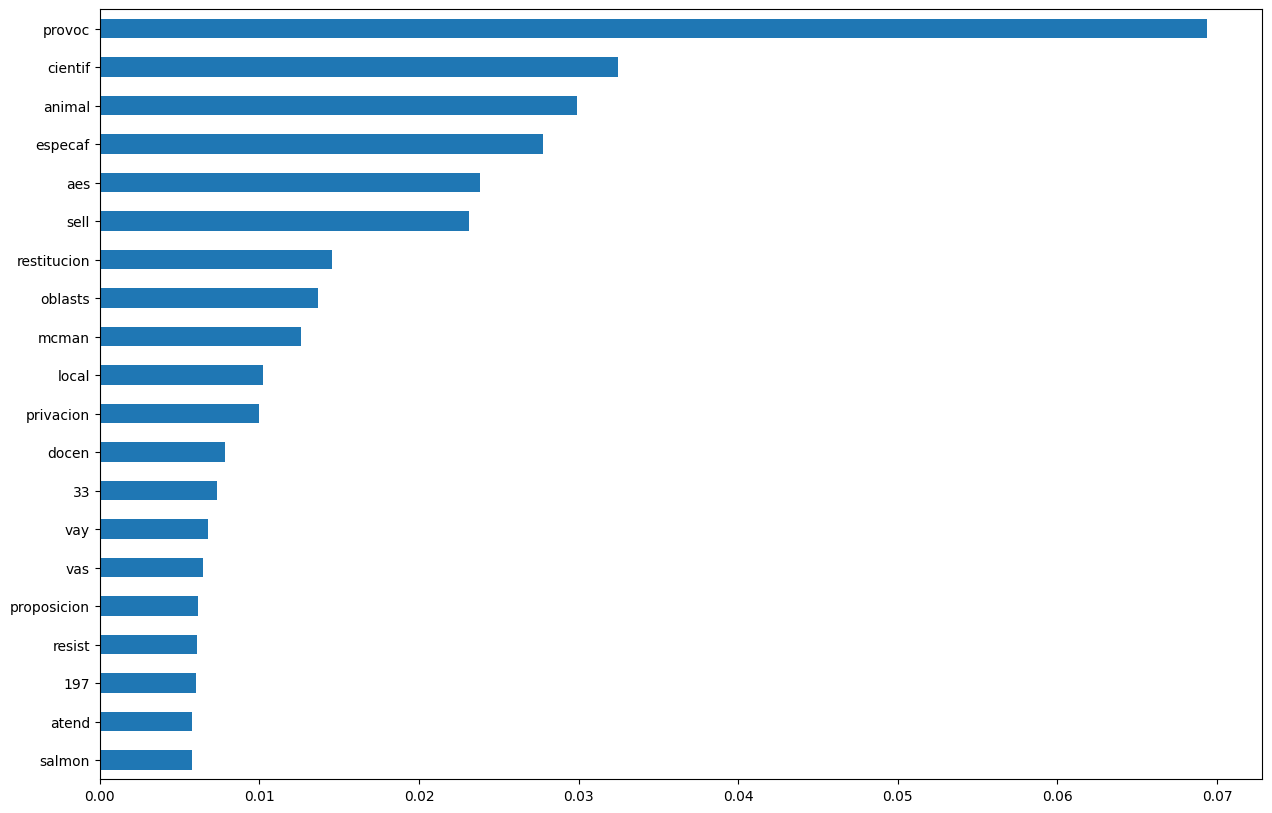

In [31]:
# Feature importance in tree models is an indicator on how relevant is a feature for taking the decision by the model
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [32]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 58.17


In [33]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test["Textos_espanol"]))

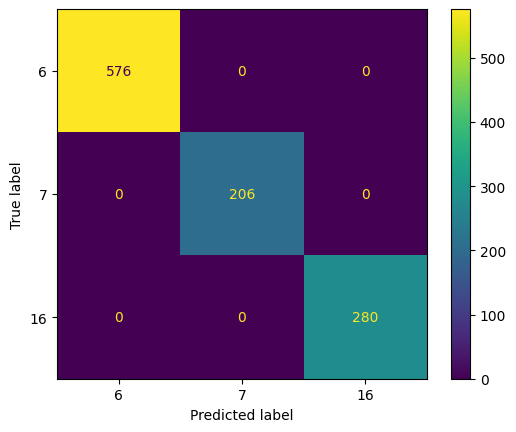

In [34]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

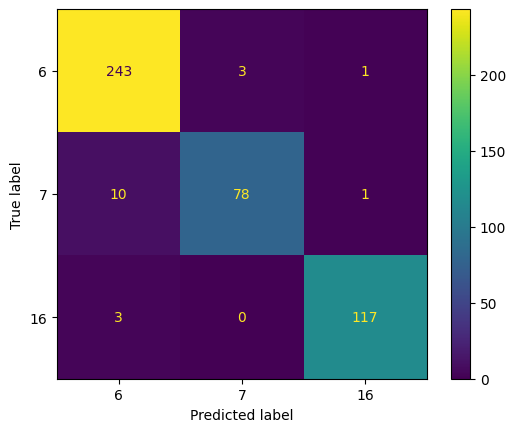

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [36]:
print(PRECISION, precision_score(y_train, y_train_bow_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_bow_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_bow_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [37]:
print(PRECISION, precision_score(y_test, y_test_bow_predict, average="weighted"))
print(RECALL, recall_score(y_test, y_test_bow_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_bow_predict, average="weighted"))

Precision: 0.9608419478750321
Recall: 0.9605263157894737
F1: 0.9601145075863973


## Training a model with TF-IDF

In [38]:
tfidf_model = RandomForestClassifier(random_state=3)

In [39]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

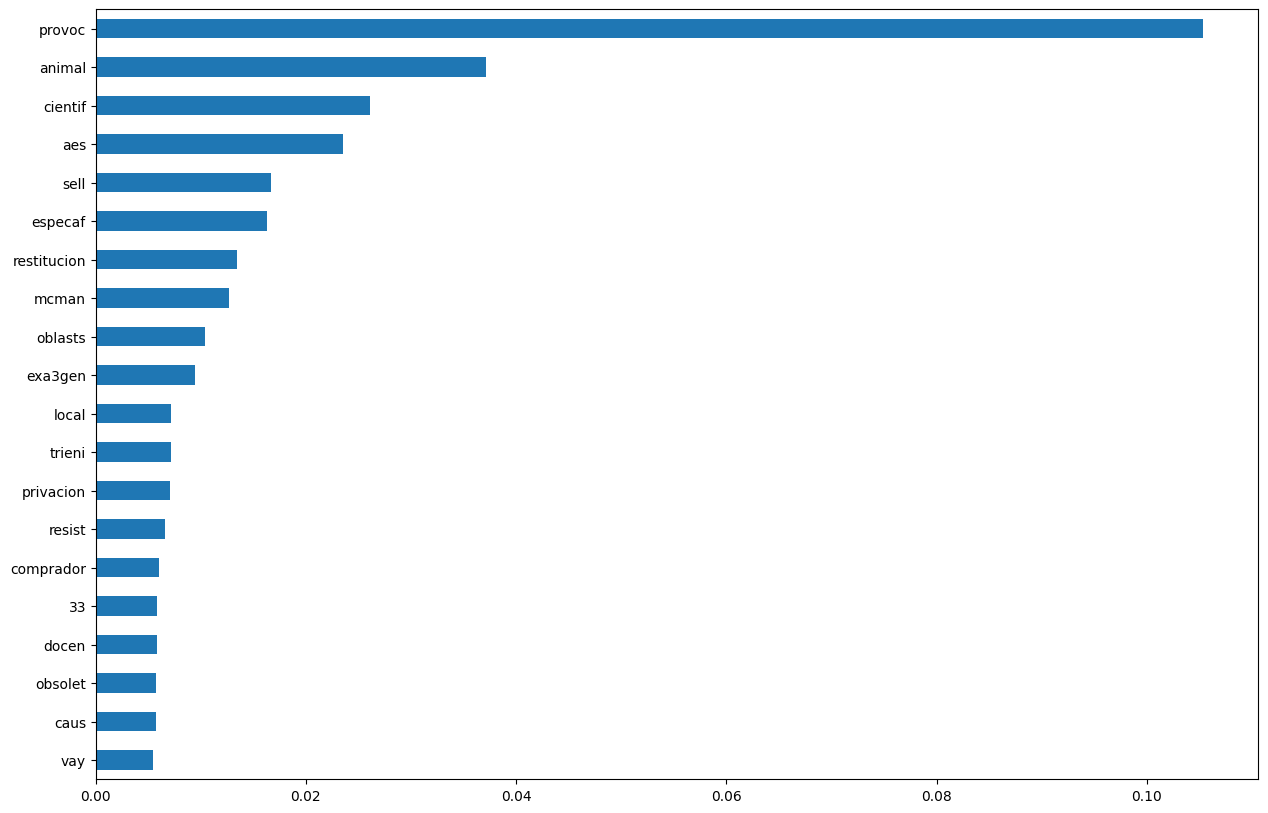

In [40]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [41]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 52.32


In [42]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test["Textos_espanol"]))

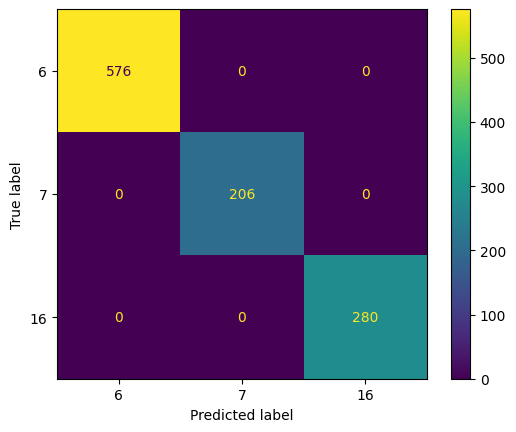

In [43]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

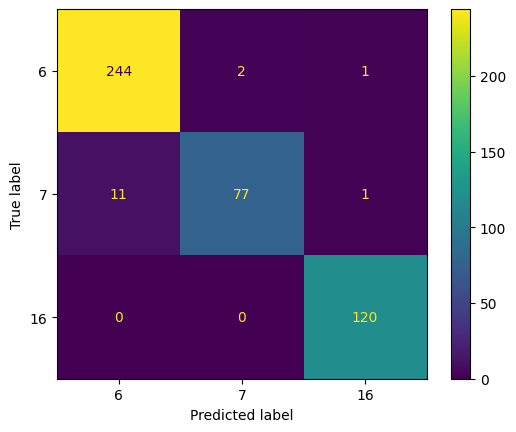

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [45]:
print(PRECISION, precision_score(y_train, y_train_tfidf_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_tfidf_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_tfidf_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [46]:
print(PRECISION, precision_score(y_test, y_test_tfidf_predict, average="weighted"))  
print(RECALL, recall_score(y_test, y_test_tfidf_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_tfidf_predict, average="weighted"))

Precision: 0.9673787727357446
Recall: 0.9671052631578947
F1: 0.9664542797829031


## Training a model with SVM

In [47]:
# Vectorizar tus textos utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["Textos_espanol"])
X_test_tfidf = tfidf_vectorizer.transform(X_test["Textos_espanol"])


In [48]:
# Entrenar un modelo SVM
svm_classifier = SVC(kernel="linear", C=1)  # Puedes ajustar los hiperparámetros según sea necesario
svm_classifier.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [49]:
coeficientes = abs(svm_classifier.coef_.toarray()[0]) 

In [50]:
nombres_caracteristicas = tfidf_vectorizer.get_feature_names_out()

In [51]:
df_coeficientes = pd.DataFrame({'Palabra': nombres_caracteristicas, 'Coeficiente': coeficientes})

In [52]:
df_coeficientes = df_coeficientes.sort_values(by='Coeficiente', key=np.abs, ascending=False)

In [53]:
palabras_importantes = df_coeficientes.head(10)

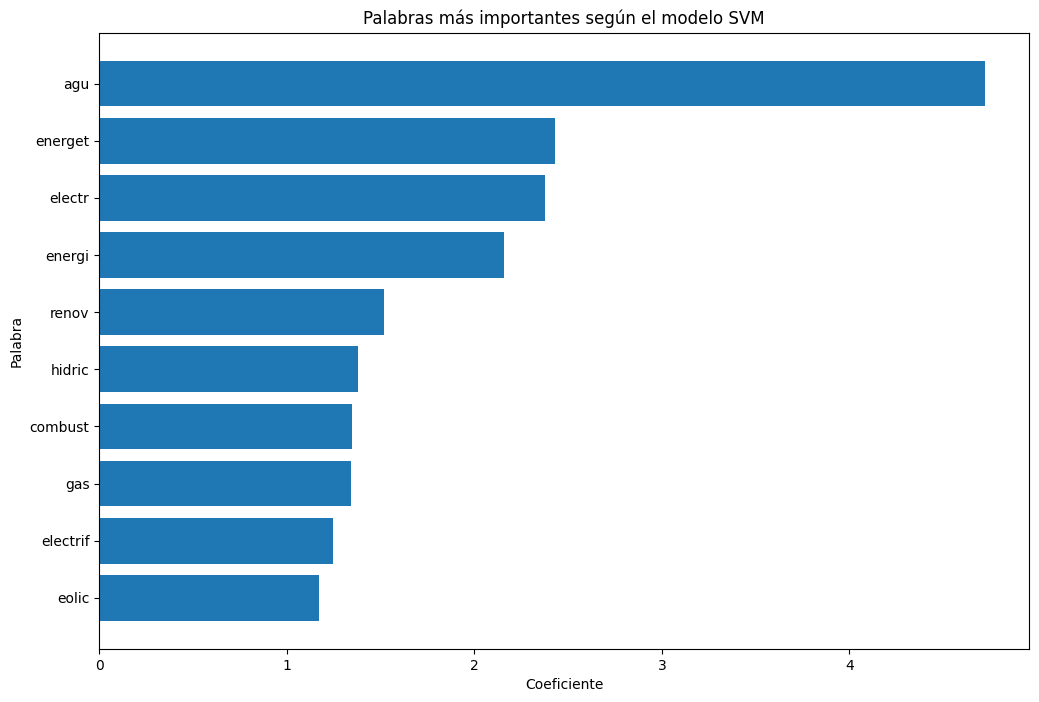

In [54]:
plt.figure(figsize=(12, 8))
plt.barh(palabras_importantes['Palabra'], palabras_importantes['Coeficiente'])
plt.xlabel('Coeficiente')
plt.ylabel('Palabra')
plt.title('Palabras más importantes según el modelo SVM')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las palabras más importantes en la parte superior
plt.show()

In [55]:
# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test_tfidf)


In [56]:
# Calcular las métricas para todo el conjunto de prueba
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Imprimir las métricas
print("Precisión promedio:", precision)
print("Recall promedio:", recall)
print("F1-score promedio:", f1)

Precisión promedio: 0.98095703125
Recall promedio: 0.9802631578947368
F1-score promedio: 0.9800223455137752


In [57]:
# Obtener predicciones en el conjunto de entrenamiento
y_train_pred_svm = svm_classifier.predict(X_train_tfidf)

# Calcular métricas de evaluación en el conjunto de entrenamiento
f1_svm_train = f1_score(y_train, y_train_pred_svm, average='weighted')
precision_svm_train = precision_score(y_train, y_train_pred_svm, average='weighted')
recall_svm_train = recall_score(y_train, y_train_pred_svm, average='weighted')

print("F1 Score en conjunto de entrenamiento (SVM):", f1_svm_train)
print("Precisión en conjunto de entrenamiento (SVM):", precision_svm_train)
print("Recall en conjunto de entrenamiento (SVM):", recall_svm_train)

F1 Score en conjunto de entrenamiento (SVM): 0.9981196721162332
Precisión en conjunto de entrenamiento (SVM): 0.9981348688975807
Recall en conjunto de entrenamiento (SVM): 0.9981167608286252


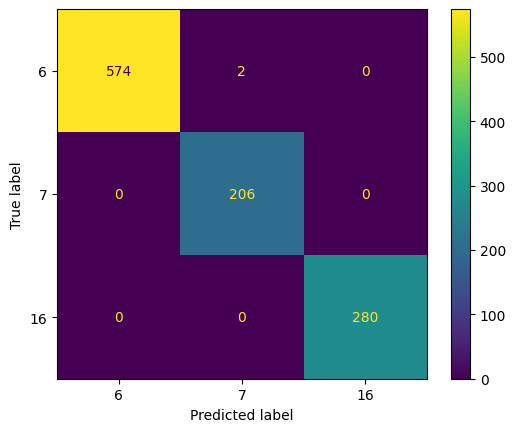

In [58]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_svm)

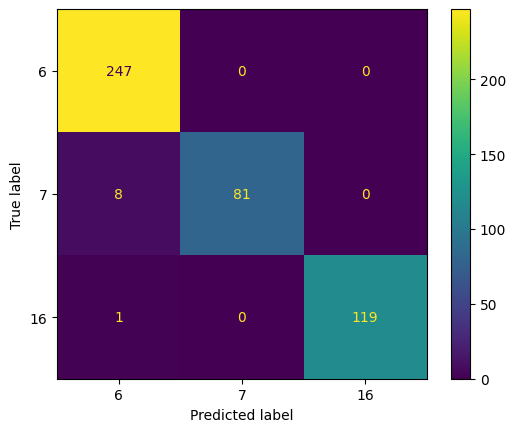

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Model selection

In [60]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4)),
])

In [61]:
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100], 
}


In [62]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring=["precision", "recall", "f1"], refit="f1", cv=7, return_train_score=True, verbose=1, random_state=5)


In [63]:
search.fit(X_train["Textos_espanol"], y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('vectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                                                          'por',
                                                                          'un',
                                                                          'para',
                                                                          'con',
                                                                          'no',
                                                                          'una',
                                                                          'su',
                                                                          'al',
                                                                          'lo',
                                                                          'como',
                                                                          'más',
                                                                          'pero',
                                                                          'sus',
                                                                          'le',
                                                                          'ya',
                                                                          'o',
                                                                          'este',
                                                                          'sí',
                                                                          'porque', ...],
                                                              tokenizer=<function word_tokenize at 0x7f79264a54e0>)),
                                             ('classifier',
                                              RandomForestClassif...
                                                                                   'la',
                                                                                   'que',
                                                                                   'el',
                                                                                   'en',
                                                                                   'y',
                                                                                   'a',
                                                                                   'los',
                                                                                   'del',
                                                                                   'se',
                                                                                   'las',
                                                                                   'por',
                                                                                   'un',
                                                                                   'para',
                                                                                  

In [64]:
search.best_params_

{'vectorizer__lowercase': False,
 'vectorizer': CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x7f79264a54e0>),
 'classifier__n_estimators': 100,
 'classifier__max_depth': 100,
 'classifier__criterion': 'gini'}

In [65]:
search.best_score_

nan

In [66]:
y_train_search_predict = search.best_estimator_.predict(X_train["Textos_espanol"])
y_test_search_predict = search.best_estimator_.predict(X_test["Textos_espanol"])


In [67]:
print(PRECISION, precision_score(y_train, y_train_search_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_search_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_search_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [68]:
print(PRECISION, precision_score(y_test, y_test_search_predict, average="weighted"))
print(RECALL, recall_score(y_test, y_test_search_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_search_predict, average="weighted"))

Precision: 0.9670999682343022
Recall: 0.9671052631578947
F1: 0.9667196100768531


# Predicción y guardado de data

In [69]:
ods_df_unlabeled = pd.read_csv("../data/SinEtiquetatest_cat_6716.csv")
#Predict the labels of the unlabeled data
y_unlabeled_predict = search.best_estimator_.predict(ods_df_unlabeled["Textos_espanol"])
#Add the predicted labels to the unlabeled data
ods_df_unlabeled["sdg"] = y_unlabeled_predict
#Save the labeled data
ods_df_unlabeled.to_csv("../data/Predicted.csv", index=False)
